In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_context("notebook", font_scale=1.5)
sns.set_style("whitegrid", rc={ 'font.family': ['fantasy'], 'grid.linestyle': '--'})
sns.set_palette("tab10", n_colors=3, desat=1)

# Data quality assessment

In [3]:
train_filepath = "./train.csv"
train_data = pd.read_csv(train_filepath)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
train_data[['Survived', 'Pclass', 'SibSp', 'Parch']]\
    = train_data[['Survived', 'Pclass', 'SibSp', 'Parch']].astype('uint8')
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data.dropna(subset=['Embarked'], inplace=True)

In [6]:
train_data = pd.concat((train_data, pd.get_dummies(train_data['Embarked'])), axis=1)
train_data['Sex_'] = (train_data['Sex'] == 'male').astype('uint8')
train_data.drop(['PassengerId'], axis=1, inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  99750 non-null  uint8  
 1   Pclass    99750 non-null  uint8  
 2   Name      99750 non-null  object 
 3   Sex       99750 non-null  object 
 4   Age       99750 non-null  float64
 5   SibSp     99750 non-null  uint8  
 6   Parch     99750 non-null  uint8  
 7   Ticket    95136 non-null  object 
 8   Fare      99750 non-null  float64
 9   Cabin     32046 non-null  object 
 10  Embarked  99750 non-null  object 
 11  C         99750 non-null  uint8  
 12  Q         99750 non-null  uint8  
 13  S         99750 non-null  uint8  
 14  Sex_      99750 non-null  uint8  
dtypes: float64(2), object(5), uint8(8)
memory usage: 6.8+ MB


# Data exploration

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex_
count,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000,99750.000000
mean,0.427589,2.107098,38.374045,0.397815,0.454416,43.887381,0.222426,0.054376,0.723198,0.561353
std,0.494731,0.837693,18.010092,0.863128,0.950363,69.529417,0.415878,0.226759,0.447420,0.496224
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.460000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.470000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D66D19FE20>,
      dtype=object)

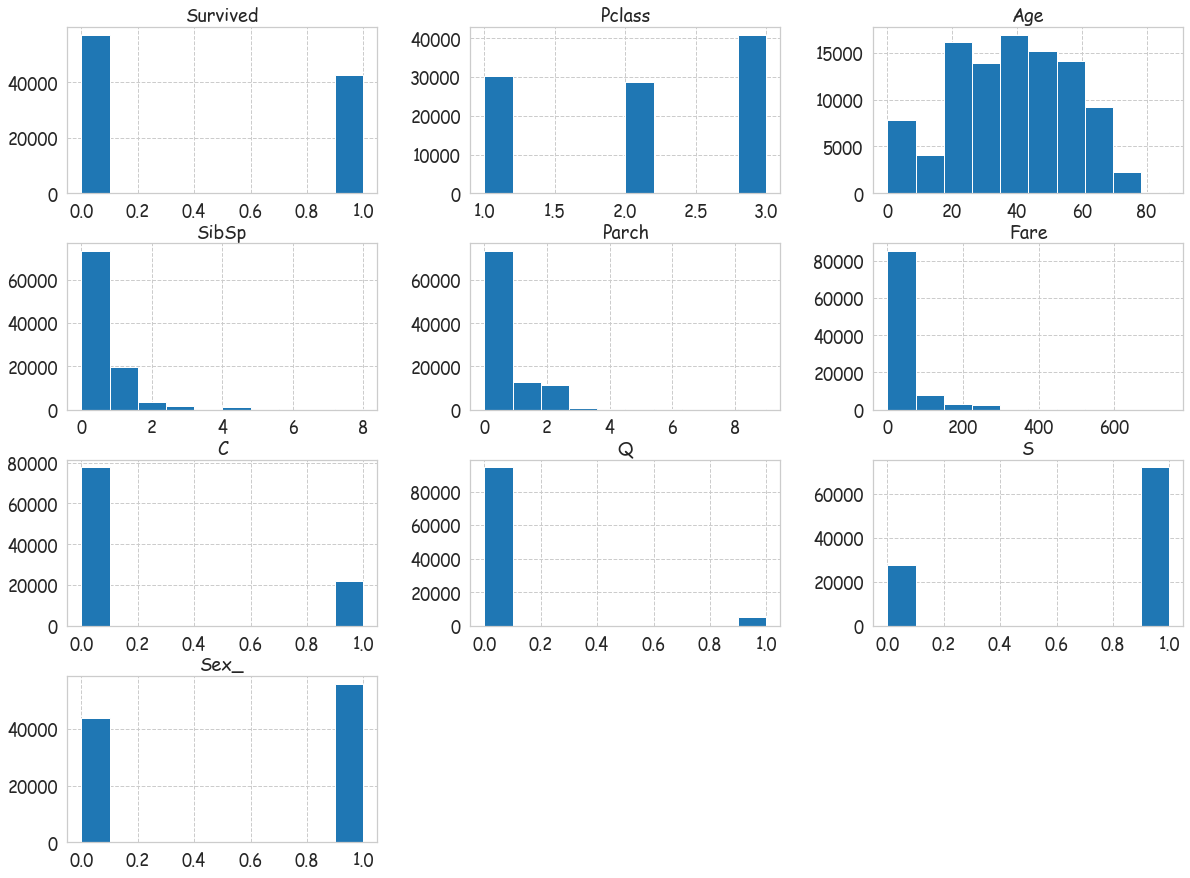

In [9]:
train_data.hist(figsize=(20, 15))

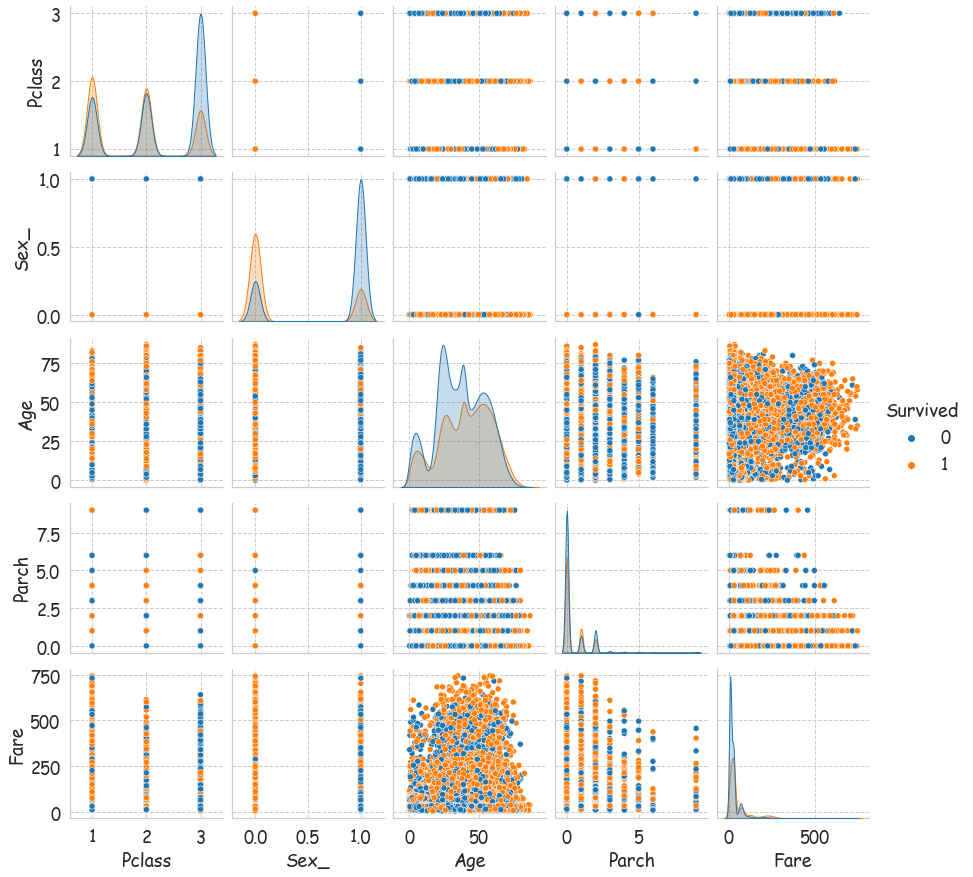

In [10]:
sns.pairplot(train_data[[u'Survived', u'Pclass', u'Sex_', u'Age', u'Parch', u'Fare']],\
            hue='Survived')

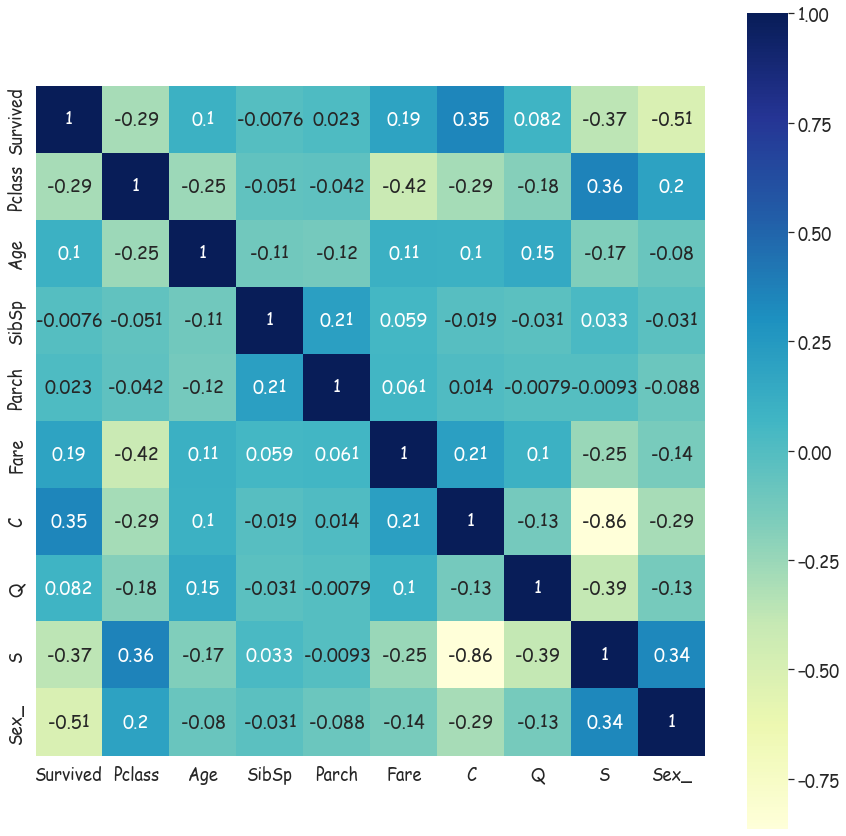

In [11]:
plt.subplots(figsize=(15, 15))
sns.heatmap(train_data._get_numeric_data().corr(),
            square=True, linecolor='white', annot=True, cmap="YlGnBu")

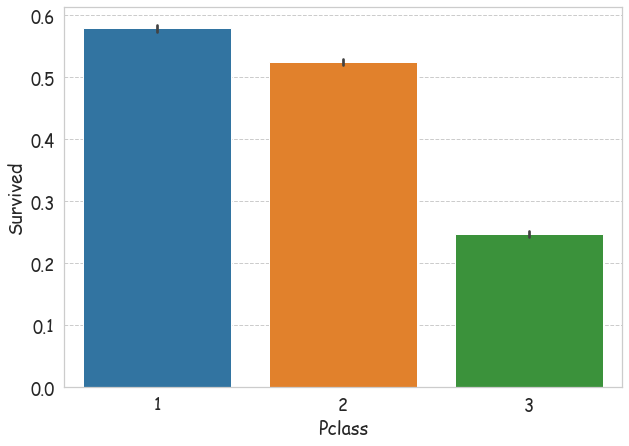

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

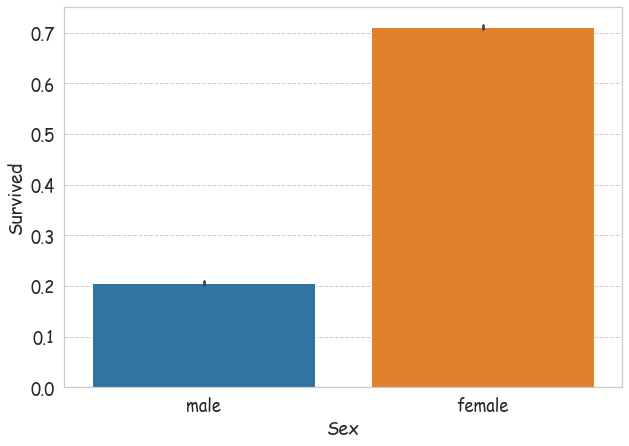

In [13]:
sns.barplot(x='Sex', y='Survived', data=train_data)

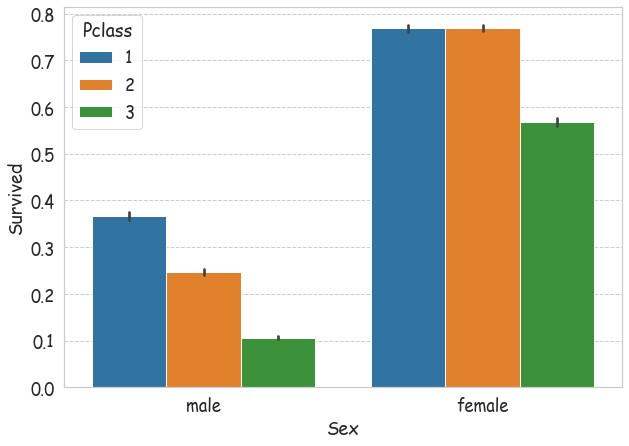

In [14]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

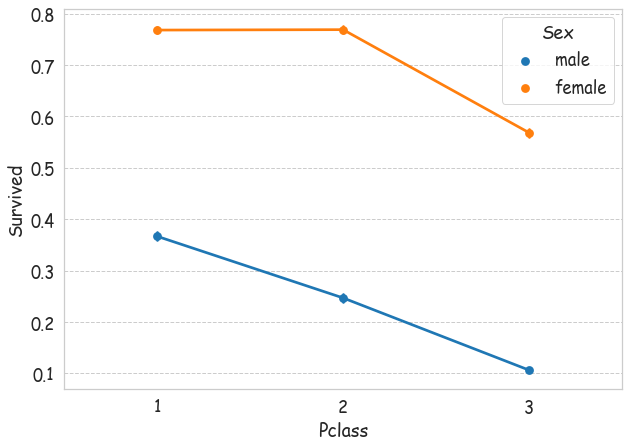

In [15]:
sns.pointplot(x='Pclass', y='Survived', hue="Sex", data=train_data)

In [16]:
train_data['SibSp'].value_counts(dropna=False)

0    73133
1    19692
2     3696
3     1634
4     1167
8      296
5      132
Name: SibSp, dtype: int64

In [17]:
train_data['Parch'].value_counts(dropna=False)

0    73372
1    12954
2    11200
3      981
4      444
5      331
9      264
6      204
Name: Parch, dtype: int64

In [18]:
train_data['AgeBin'] = pd.cut(train_data['Age'].astype(int), 5)
train_data['AgeBin'].head()

0      (34.8, 52.2]
1      (34.8, 52.2]
2    (-0.087, 17.4]
3      (17.4, 34.8]
4      (17.4, 34.8]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.087, 17.4] < (17.4, 34.8] < (34.8, 52.2] < (52.2, 69.6] < (69.6, 87.0]]

In [19]:
train_data['FareBin'] = pd.cut(train_data['Fare'].astype(int), 5)
train_data['FareBin'].head()

0    (-0.744, 148.8]
1    (-0.744, 148.8]
2    (-0.744, 148.8]
3    (-0.744, 148.8]
4    (-0.744, 148.8]
Name: FareBin, dtype: category
Categories (5, interval[float64, right]): [(-0.744, 148.8] < (148.8, 297.6] < (297.6, 446.4] < (446.4, 595.2] < (595.2, 744.0]]

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train_data['AgeBinRank'] = label.fit_transform(train_data['AgeBin'])
train_data[['Age', 'AgeBin', 'AgeBinRank']].head()

,Age,AgeBin,AgeBinRank
0,39.00,"(34.8, 52.2]",2
1,39.00,"(34.8, 52.2]",2
2,0.33,"(-0.087, 17.4]",0
3,19.00,"(17.4, 34.8]",1
4,25.00,"(17.4, 34.8]",1


In [21]:
train_data['AgeBin'].value_counts()

(34.8, 52.2]      32120
(17.4, 34.8]      29981
(52.2, 69.6]      23363
(-0.087, 17.4]    11891
(69.6, 87.0]       2395
Name: AgeBin, dtype: int64

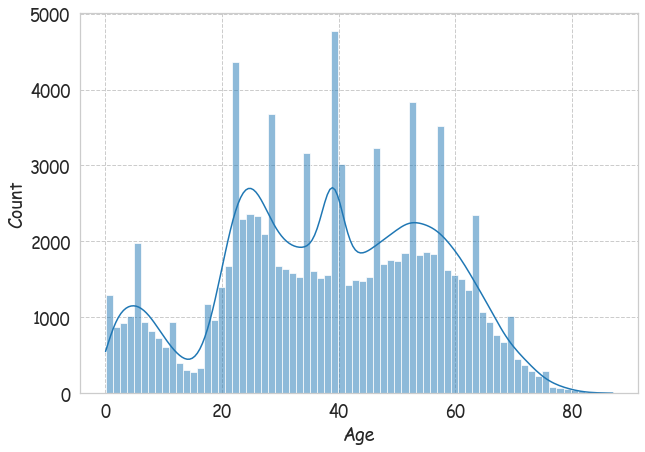

In [22]:
sns.histplot(train_data['Age'], kde=True)

In [23]:
train_data['FareBinRank'] = label.fit_transform(train_data['FareBin'])
train_data[['Fare', 'FareBin', 'FareBinRank']].head()

,Fare,FareBin,FareBinRank
0,27.14,"(-0.744, 148.8]",0
1,13.35,"(-0.744, 148.8]",0
2,71.29,"(-0.744, 148.8]",0
3,13.04,"(-0.744, 148.8]",0
4,7.76,"(-0.744, 148.8]",0


In [24]:
train_data['FareBin'].value_counts()

(-0.744, 148.8]    93274
(148.8, 297.6]      5089
(297.6, 446.4]       774
(446.4, 595.2]       533
(595.2, 744.0]        80
Name: FareBin, dtype: int64

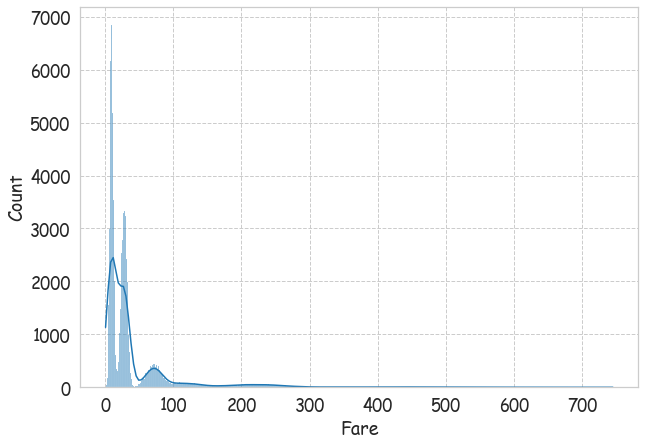

In [25]:
sns.histplot(train_data['Fare'], kde=True)

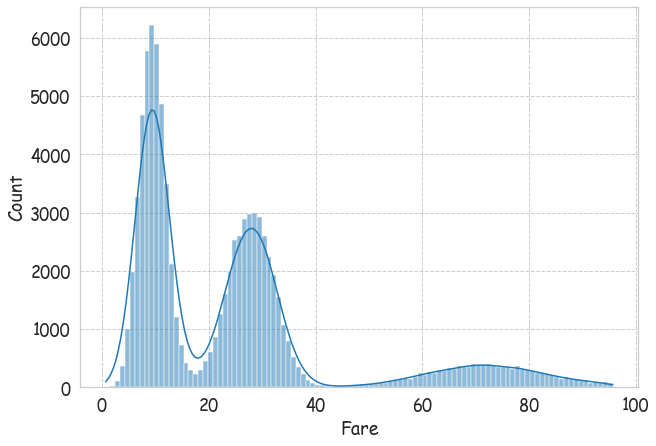

In [26]:
sns.histplot(train_data['Fare'][train_data['Fare']<train_data['Fare'].quantile(0.9)], kde=True)

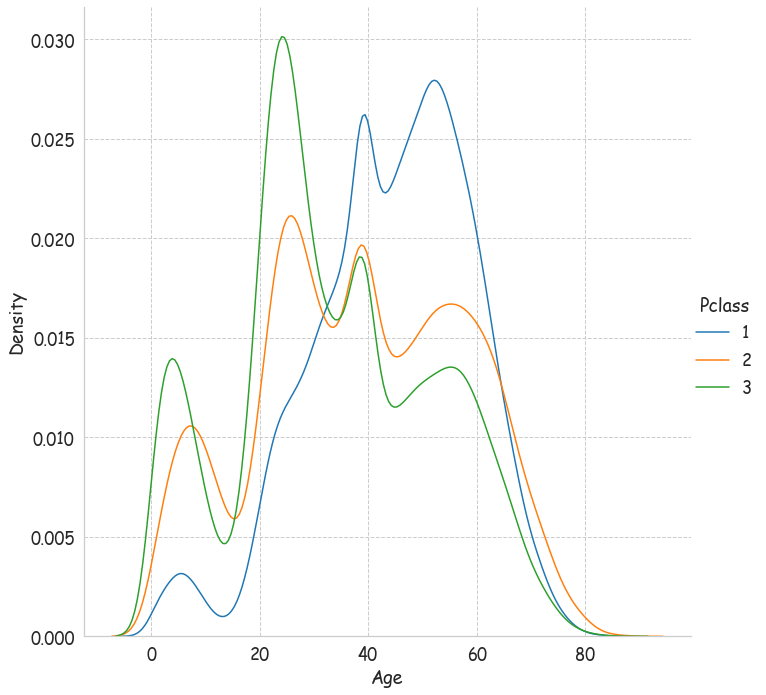

In [27]:
facet = sns.FacetGrid(data=train_data, hue='Pclass', legend_out=True, height=10)
facet = facet.map(sns.kdeplot, 'Age')
facet.add_legend()

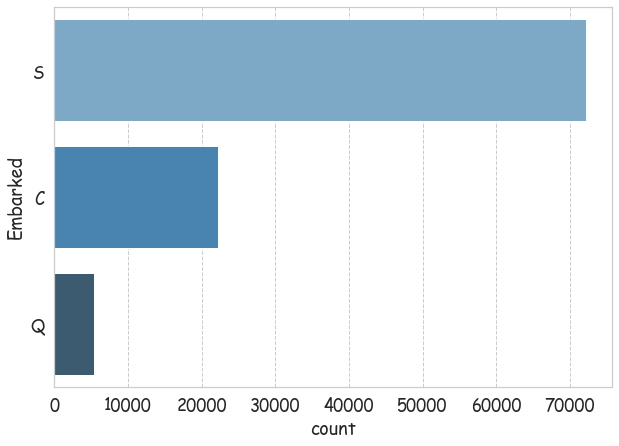

In [28]:
sns.countplot(y="Embarked", data=train_data, palette="Blues_d")

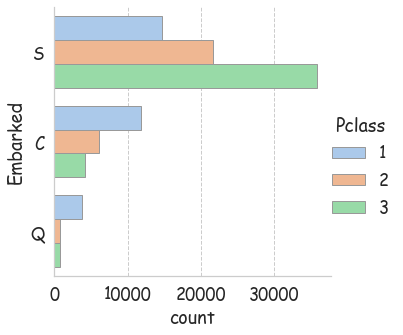

In [29]:
sns.catplot(y="Embarked", hue="Pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_data)

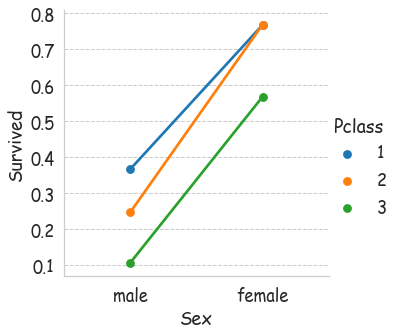

In [30]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train_data)

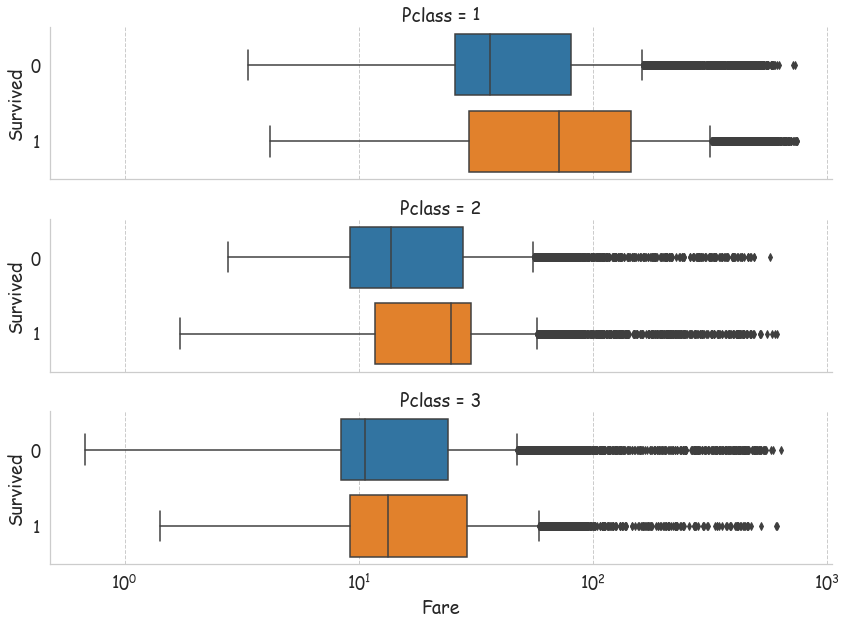

In [31]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=3, aspect=4,
                data=train_data.query("Fare > 0"))
g.set(xscale="log")

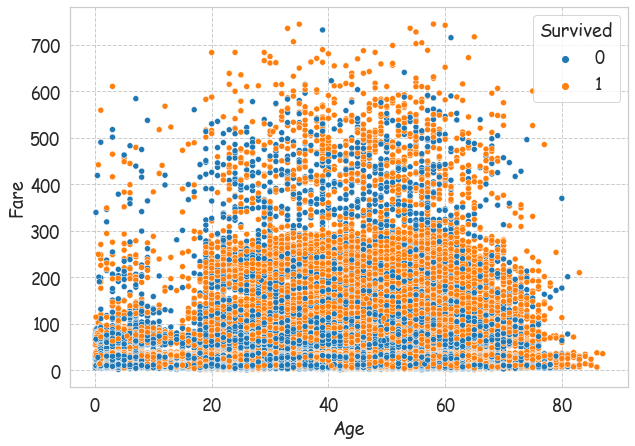

In [32]:
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Survived'])

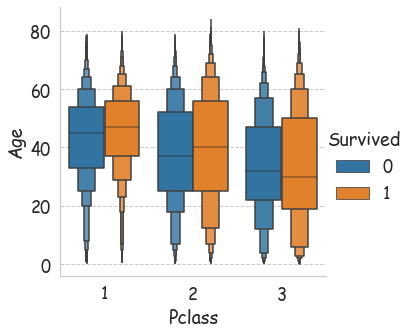

In [33]:
sns.catplot(x='Pclass', y='Age', hue='Survived', kind='boxen', data=train_data, showfliers=False)

# Summary

- Корреляция между признаками низкая, самая высокая - между полом и выжившими.
- Доля выживших больше всего среди 1 и 2 классов более 0.5. В третьем намного меньше - более 0.2.
- Среди женщин - доля выживших 0.7, среди мужчин - 0.2.
- Распределение по возрасту отличается от нормального. Но, если смотреть по классам, то видно, что наибольшая доля пассажиров 1 класса примерно 50 лет, среди пассажиров 2 и 3 классов большие доли между 20 и 30 годами.
- Основная стоимость билетов составляет до 40.
- Основной порт посадки S (~70000 чел.). Причем пассажиры 1 класса садились в портах C и S в схожих долях.
- Так же, по "ящикам с усами" по стоимости билетов, прослеживается тенденция более высокой медианной стоимости проезда у выживших!? По диагрмме scatterplot, заметна практически 100%-ая выживаемость у пассажиров, которые платили за проезд более 600.